## Imports

In [7]:
import numpy as np

import sympy as sp
from sympy.utilities.lambdify import lambdify

import matplotlib.pyplot as plt
import time
from numba import njit

from sympy import init_printing
init_printing(use_latex=True)

## Numba accelerator

In [20]:
@njit
def solve_1d_burger_numba(u, un, nt, nx, dt, dx, nu):
    for n in range(nt):  #iterate through time
        for i in range(nx):
            un[i] = u[i] ##copy the existing values of u into un
            for i in range(1, nx-1): #iterate through the nbr of x values 
                u[i] = un[i] +  (nu*dt /(dx**2)) * (un[i+1] - 2*un[i]+un[i-1])-un[i]*dt/dx(un[i]-un[i-1]) #the expression
    return 0

## Inputs

In [16]:
x, nu, t = sp.symbols('x nu t')

phi = (sp.exp(-(x - 4 * t)**2 / (4 * nu * (t + 1))) +
       sp.exp(-(x - 4 * t - 2 * sp.pi)**2 / (4 * nu * (t + 1))))

phiprime = phi.diff(x)

u = -2 * nu * (phiprime / phi) + 4
ufunc = lambdify((t, x, nu), u)

###variable declarations
nx = 201
nt = 100
dx = 2 * np.pi / (nx - 1)
nu = .07
dt = dx * nu

x = np.linspace(0, 2 * np.pi, nx)
un = np.empty(nx)
t = 0

## Plot initial condition

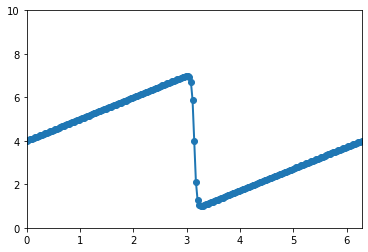

In [17]:
u = np.asarray([ufunc(t, x0, nu) for x0 in x])
plt.figure()
plt.plot(x, u, marker='o', lw=2)
plt.xlim([0, 2 * np.pi])
plt.ylim([0, 10]);

# Analytical solution
u_analytical = np.asarray([ufunc(nt * dt, xi, nu) for xi in x])

### Call the function to solve the burger equation

In [19]:
solve_1d_burger(u_analytical, un, nt, nx, dt, dx, nu)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1mInvalid use of float64 with parameters (float64)
No type info available for float64 as a callable.[0m
[0m[1mDuring: resolving callee type: float64[0m
[0m[1mDuring: typing of call at C:\Users\ADMIN\AppData\Local\Temp/ipykernel_9936/1022656483.py (7)
[0m
[1m
File "..\..\..\..\AppData\Local\Temp\ipykernel_9936\1022656483.py", line 7:[0m
[1m<source missing, REPL/exec in use?>[0m


### Plotting data
- Expected output:
    
![Burger](../data/Burger.png)

In [ ]:
plt.figure()
plt.plot(x, u, marker='o', lw=2)
plt.plot(x, u_analytical, color='orange', lw=2)
plt.xlim([0, 2 * np.pi])
plt.ylim([0, 10]);

## Call Funtions using timeit

### Pure function

In [21]:
def solve_1d_burger(u, un, nt, nx, dt, dx, nu):
    for n in range(nt):  #iterate through time
        for i in range(nx):
            un[i] = u[i] ##copy the existing values of u into un
            for i in range(1, nx-1): #iterate through the nbr of x values 
                u[i] = un[i] +  (nu*dt /(dx**2)) * (un[i+1] - 2*un[i]+un[i-1])-un[i]*dt/dx(un[i]-un[i-1]) #the expression
    return 0

In [23]:
%timeit solve_1d_burger(u, un, nt, nx, dt, dx, nu)

### Function with numba accelerator

In [22]:
%timeit solve_1d_burger_numba(u, un, nt, nx, dt, dx, nu)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1mInvalid use of float64 with parameters (float64)
No type info available for float64 as a callable.[0m
[0m[1mDuring: resolving callee type: float64[0m
[0m[1mDuring: typing of call at C:\Users\ADMIN\AppData\Local\Temp/ipykernel_9936/1235672481.py (7)
[0m
[1m
File "..\..\..\..\AppData\Local\Temp\ipykernel_9936\1235672481.py", line 7:[0m
[1m<source missing, REPL/exec in use?>[0m
